#  SVR
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

# Import stock data


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='MAINUT5068DCQGJ9',output_format='pandas')
# Get json object with the intraday data and another with  the call's metadata



# get all available daily data (Netflix)
mydata, meta_data = ts.get_daily('NFLX',outputsize='full')

Text(0.5,0,'Date')

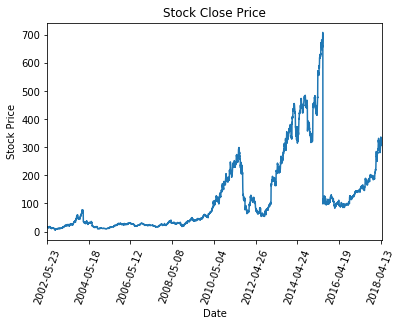

In [3]:
#data.head()
mydata['4. close'].plot()
plt.xticks(rotation=70)
plt.title('Stock Close Price')
plt.ylabel('Stock Price')
plt.xlabel('Date')

## Pre-processing
Choice of no preprocessing, differencing or Moving Average with N=5

In [4]:
dataset = mydata['4. close'].loc['2006-04-26':'2008-04-26'].values
dataset = dataset.astype('float32')

In [5]:
preproc = input("What Preprocessing do you like? None (N), Differencing (D) or Moving Average (M): ")
print("You chose: ", preproc)
#type(preproc)


What Preprocessing do you like? None (N), Differencing (D) or Moving Average (M): N
You chose:  N


In [6]:
if preproc == 'D':
    dataset = np.diff(dataset)
    print('Differencing applied')
elif preproc == 'M':
    cumsum = np.cumsum(np.insert(dataset, 0, 0)) 
    dataset = (cumsum[5:] - cumsum[:-5]) / float(5)
    print('Moving Average applied')
else:
    dataset = dataset
    print('no preprocessing applied')

no preprocessing applied


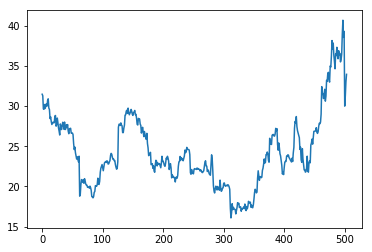

In [7]:
plt.plot(dataset)

In [8]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
print(len(train), len(test))

337 167


# Neural Network


In [9]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)

In [10]:
look_back = input("How many days in the past do you want to use as feature vector? ")
print("You chose: ", look_back)

How many days in the past do you want to use as feature vector? 2
You chose:  2


In [11]:
look_back = int(look_back)
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [12]:
from sklearn.svm import SVR

In [13]:
clf = SVR(C=1.0, epsilon=0.2)
clf = clf.fit(trainX, trainY)

In [14]:
trainPredict = clf.predict(trainX)
testPredict = clf.predict(testX)

In [15]:
print(testPredict)

[ 17.54140893  17.24404503  17.34873659  18.28412796  18.11771449
  18.01565606  18.12078401  17.89611337  17.45095661  17.36861529
  17.17935127  17.54135826  18.82990158  20.13499572  19.90516246
  19.6571043   19.54230634  19.63336573  21.33876399  22.30957825
  21.56401743  21.0056057   21.23292884  21.28179534  21.16451056
  21.19064969  22.37086279  22.40426266  22.9590918   23.31941088
  22.79407692  22.93660841  23.6072881   23.87707435  24.12296525
  23.96292224  23.16176229  22.90422044  24.06914192  24.58622779
  24.40097655  24.40062078  24.48723991  26.18235235  26.29675441
  26.10051027  25.87732446  26.11675371  26.96476528  27.13634691
  27.32139502  24.60821357  24.19421063  24.32308416  24.30276947
  23.97597366  23.73121007  23.11421817  22.50890114  21.78186745
  21.88501738  21.59729699  22.78529835  23.16576951  23.0359222
  23.00351025  23.53462019  23.64734534  23.80129646  23.80947847
  23.48784234  23.37642614  23.18951664  23.05135563  22.94051113
  23.363195

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
testScore = np.sqrt(mean_squared_error(testY, testPredict))
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.79 RMSE
Test Score: 5.69 RMSE


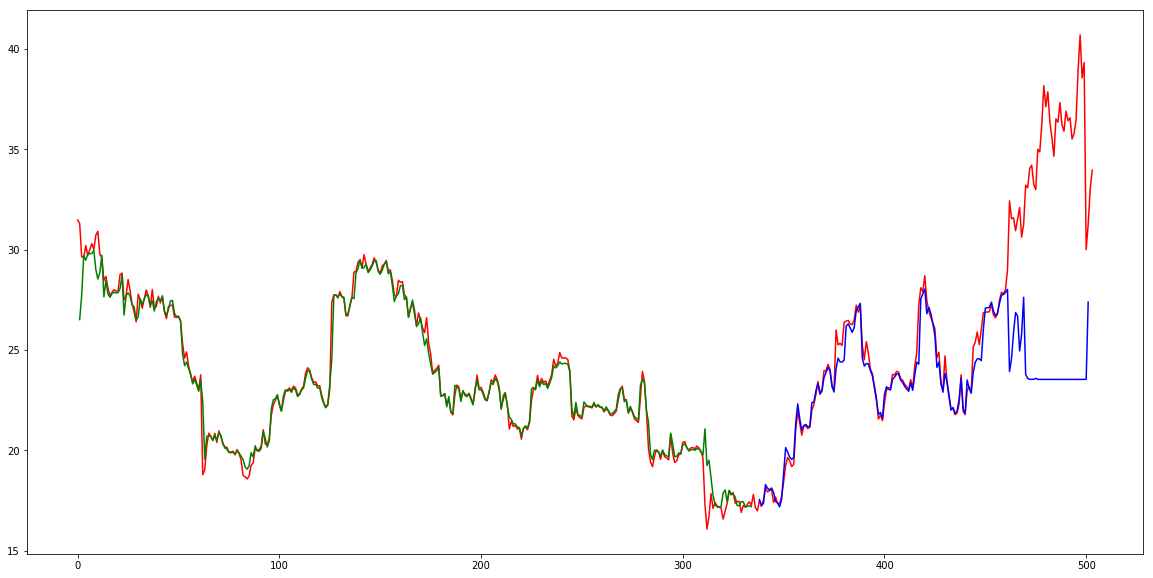

In [17]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back-1:len(trainPredict)+look_back-1] = trainPredict[:]

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset)-2] = testPredict[:]

# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(dataset,'r')
plt.plot(trainPredictPlot,'g')
plt.plot(testPredictPlot,'b')
plt.show()